In [1]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery
from scipy.interpolate import interp1d

<IPython.core.display.Javascript object>


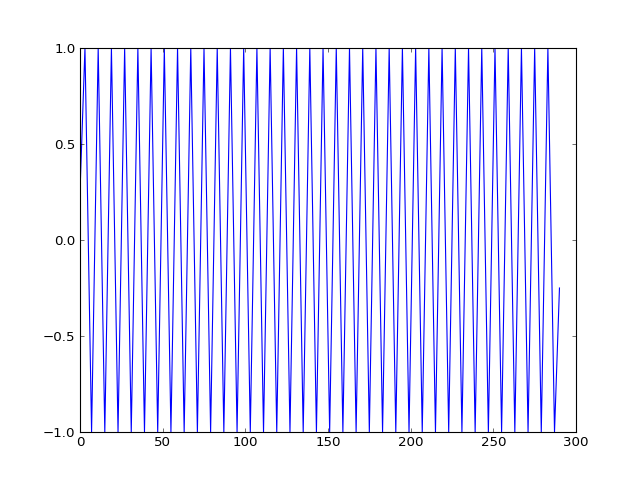

In [2]:
def insig(bits, sps, int_delay=0):
    nrz = [[1] * sps if x == 1 else [-1] * sps for x in bits]
    nrz = np.array(nrz).flatten()

    taps = [1 / sps] * sps
    matched = np.convolve(nrz, taps, mode='full')

    # delays
    sig = matched[int_delay:]
    return sig

def fract_delay(sig, fract_delay=0.0):
    f = interp1d(range(len(sig)), sig)
    new_x = np.array(range(len(sig))) + fract_delay
    fract_sig = f(new_x[:-1])
    return fract_sig

# input data
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]*4
sps = 4
sig = insig(data, sps, 0)

plt.plot(sig)
plt.show()


In [5]:
def case(i_delay=0, f_delay=0):
    data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]*8
    sps = 4
    sig = insig(data, sps, i_delay)
    
    #channel
    sig_f = fract_delay(sig, f_delay)
    noise_amp = 0.5
    sig_f += np.random.uniform(-noise_amp, noise_amp, len(sig_f))

    recover = GardnerTimingRecovery(sps)

    ret, err, mu = recover.model_main(sig_f)
    
    plt.plot(ret, label='ret')
    plt.plot(err, label='err')
    plt.plot(mu, label='mu')
#     plt.plot(sig_f[::sps], label='decimated input')
    plt.title('Fractional delay:' + str(f_delay))
    plt.grid()
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


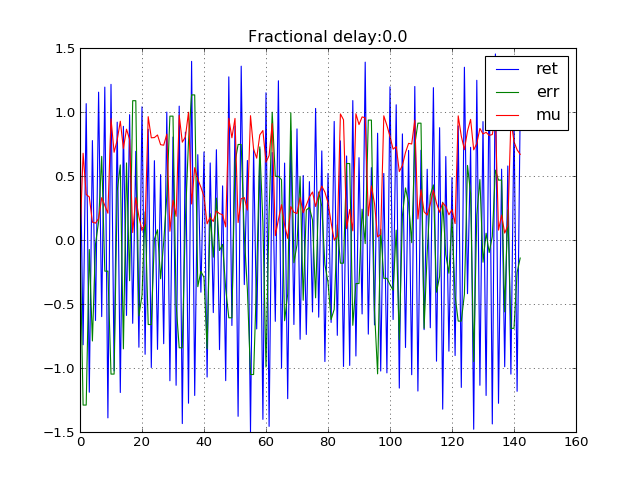

<IPython.core.display.Javascript object>


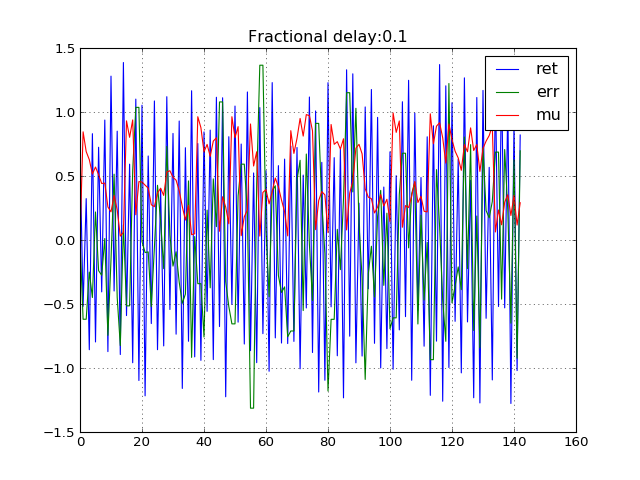

<IPython.core.display.Javascript object>


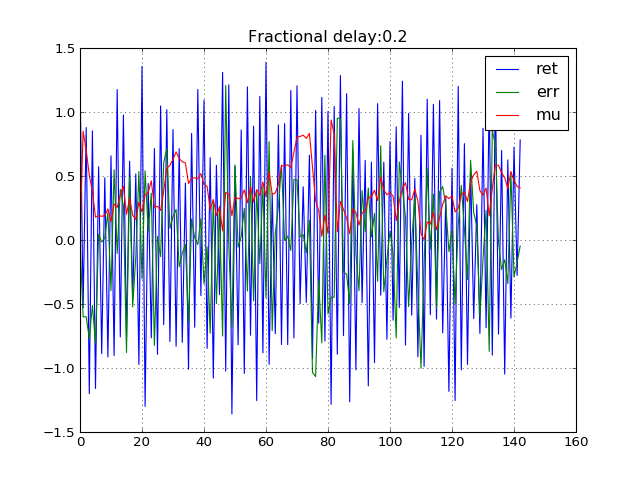

<IPython.core.display.Javascript object>


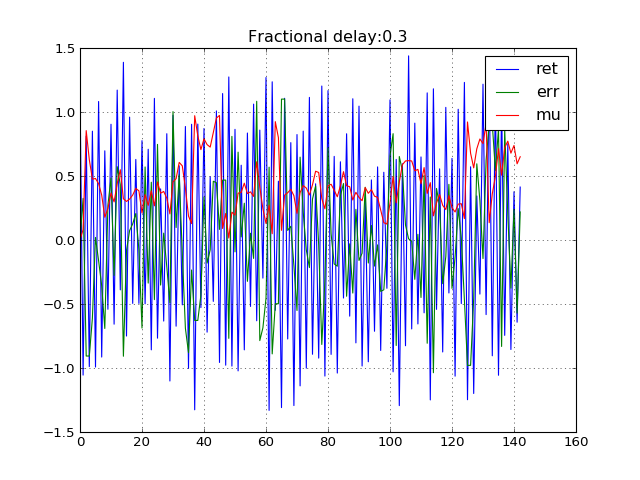

<IPython.core.display.Javascript object>


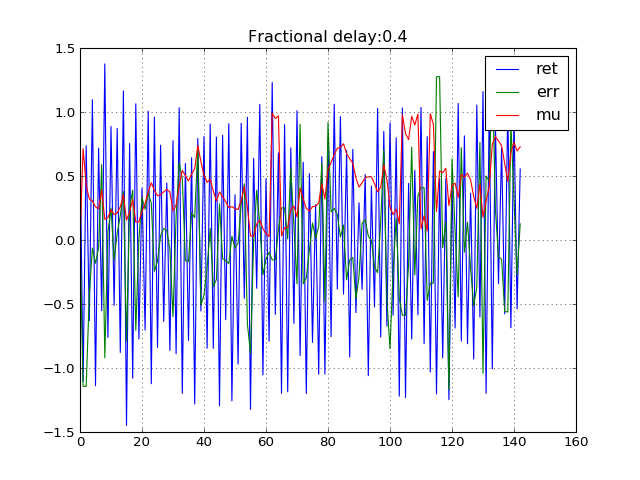

<IPython.core.display.Javascript object>


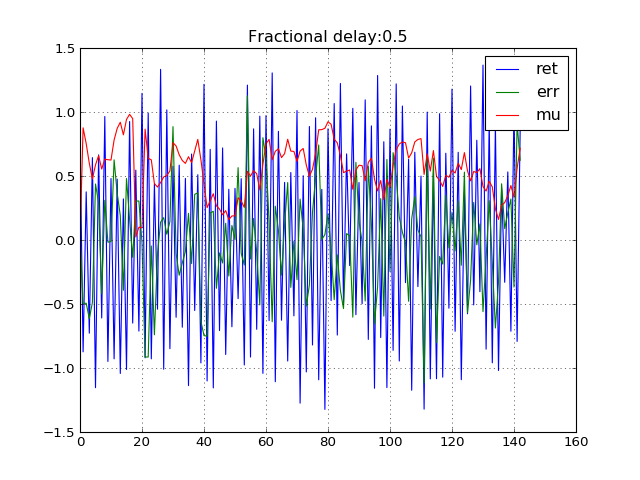

<IPython.core.display.Javascript object>


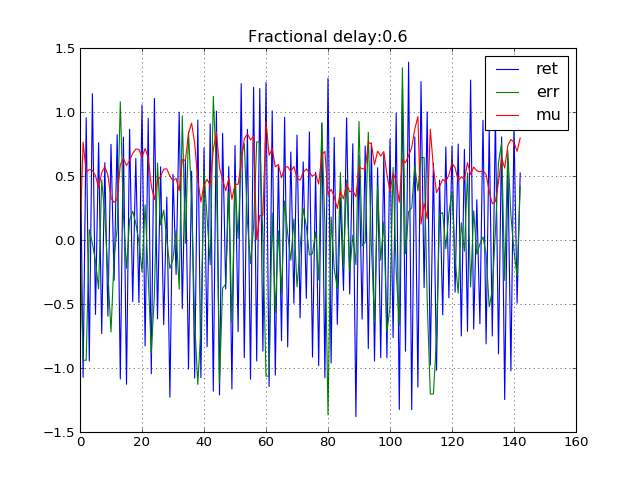

<IPython.core.display.Javascript object>


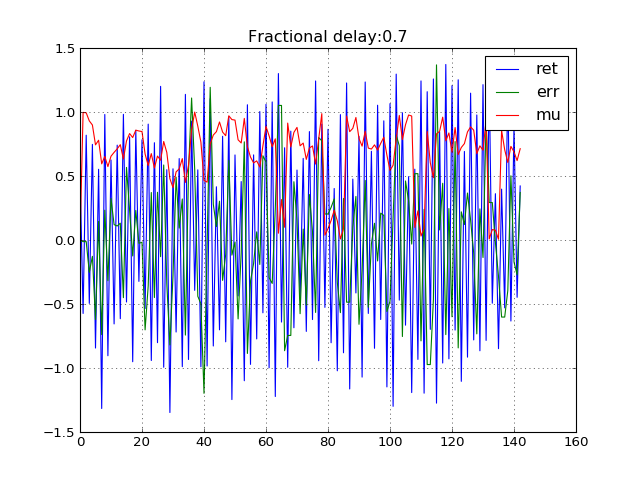

<IPython.core.display.Javascript object>


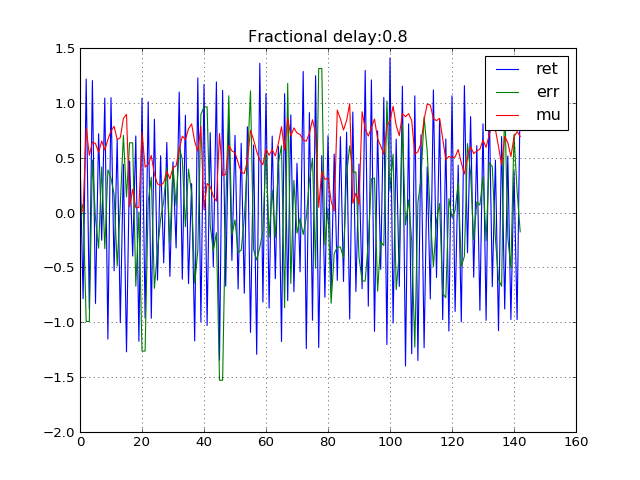

<IPython.core.display.Javascript object>


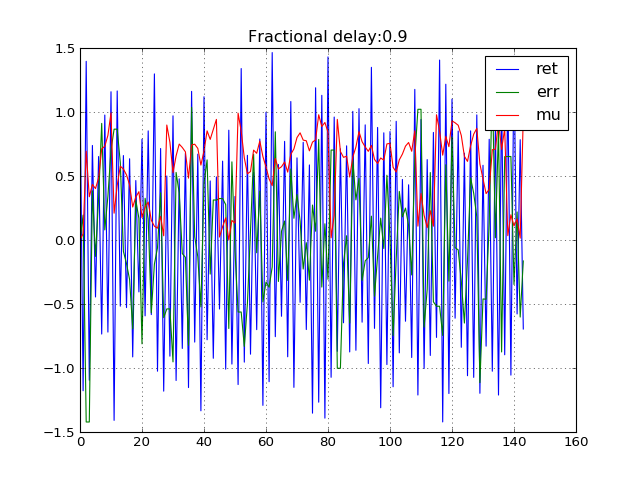

In [6]:
for x in range(10):
    case(1, x/10)